In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

taolanaro mg
lebu cl
punta arenas cl
punta arenas cl
albany au
najran sa
jumla np
boa vista br
butaritari ki
yellowknife ca
albany au
avarua ck
kavieng pg
mpanda tz
port-gentil ga
messina it
rikitea pf
barrow us
loubomo cg
sitka us
saint-joseph re
barentsburg sj
yellowknife ca
kadirli tr
ponta do sol cv
touros br
esperance au
ushuaia ar
vaitape pf
caravelas br
butaritari ki
komsomolskiy ru
butaritari ki
port elizabeth za
nakano jp
darnah ly
amderma ru
avarua ck
new norfolk au
butaritari ki
siwana in
cumberland us
kegayli uz
puerto ayora ec
barentsburg sj
new norfolk au
hithadhoo mv
new norfolk au
hihifo to
pahalgam in
karamea nz
port alfred za
hermanus za
upernavik gl
kichera ru
albany au
tasiilaq gl
pochutla mx
kavieng pg
khash ir
pokrovskoye ru
bathsheba bb
cape town za
hithadhoo mv
bluff nz
butaritari ki
lagoa pt
hithadhoo mv
lasa cn
teguldet ru
albany au
ushuaia ar
hakvik no
darab ir
sikea gr
tibu co
bredasdorp za
san jose gt
tuktoyaktuk ca
airai pw
port-gentil ga
bredasdorp za
jam

mahebourg mu
butaritari ki
jamestown sh
port alfred za
san patricio mx
illoqqortoormiut gl
new norfolk au
jamestown sh
bathsheba bb
vostok ru
yellowknife ca
dianopolis br
bredasdorp za
port hardy ca
severo-kurilsk ru
mataura pf
norman wells ca
tsentralnyy ru
amahai id
tawkar sd
ilulissat gl
castro cl
rikitea pf
mataura pf
maldonado uy
faanui pf
pevek ru
tevaitoa pf
kasamwa tz
kungurtug ru
honningsvag no
atuona pf
khani ru
koumac nc
alice springs au
mahebourg mu
manggar id
mataura pf
tuatapere nz
saldanha za
agva tr
san patricio mx
ushuaia ar
kodiak us
otacilio costa br
ayan ru
wittlich de
punta arenas cl
cape town za
samusu ws
dikson ru
codrington ag
arraial do cabo br
cherskiy ru
mount isa au
georgetown sh
yarmouth ca
saint george bm
bredasdorp za
rikitea pf
port alfred za
bathsheba bb
ushuaia ar
khatanga ru
havelock us
ushuaia ar
hobart au
belmonte br
qaanaaq gl
ushuaia ar
lavrentiya ru
qaanaaq gl
nanortalik gl
bluff nz
touros br
mys shmidta ru
ponta do sol pt
amahai id
seryshevo ru


In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [9]:
import requests

# Import the API key.
from config import weather_api_key

In [25]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 37.18,
  'feels_like': 34.38,
  'temp_min': 31.78,
  'temp_max': 43.09,
  'pressure': 1029,
  'humidity': 62},
 'visibility': 10000,
 'wind': {'speed': 3.69, 'deg': 336, 'gust': 6.51},
 'clouds': {'all': 3},
 'dt': 1636157096,
 'sys': {'type': 2,
  'id': 2003257,
  'country': 'US',
  'sunrise': 1636111368,
  'sunset': 1636147971},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [12]:
# Get the JSON data.
boston_data = city_weather.json()

In [13]:
boston_data['sys']["country"]

'US'

In [14]:
boston_data["dt"]

1636157096

In [15]:
boston_data["coord"]["lat"]

42.3584

In [16]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 43.09 62 3 3.69


In [17]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-11-06 00:04:56'

In [18]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 1 | lebu
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | najran
Processing Record 6 of Set 1 | jumla
Processing Record 7 of Set 1 | boa vista
Processing Record 8 of Set 1 | butaritari
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | kavieng
Processing Record 12 of Set 1 | mpanda
Processing Record 13 of Set 1 | port-gentil
Processing Record 14 of Set 1 | messina
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | loubomo
Processing Record 18 of Set 1 | sitka
Processing Record 19 of Set 1 | saint-joseph
Processing Record 20 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 21 of Set 1 | kadirli
Processing Record 22 of Set 1 | pont

Processing Record 37 of Set 4 | cayenne
Processing Record 38 of Set 4 | spasskoye
Processing Record 39 of Set 4 | ostrovnoy
Processing Record 40 of Set 4 | prince rupert
Processing Record 41 of Set 4 | longyearbyen
Processing Record 42 of Set 4 | nizwa
Processing Record 43 of Set 4 | xucheng
Processing Record 44 of Set 4 | znamenskoye
Processing Record 45 of Set 4 | vila velha
Processing Record 46 of Set 4 | codrington
Processing Record 47 of Set 4 | acarau
Processing Record 48 of Set 4 | jian
Processing Record 49 of Set 4 | yulara
Processing Record 50 of Set 4 | abu kamal
Processing Record 1 of Set 5 | tiksi
Processing Record 2 of Set 5 | dali
Processing Record 3 of Set 5 | geraldton
Processing Record 4 of Set 5 | ust-maya
Processing Record 5 of Set 5 | karatau
Processing Record 6 of Set 5 | ayan
Processing Record 7 of Set 5 | villazon
Processing Record 8 of Set 5 | kerema
Processing Record 9 of Set 5 | zabid
Processing Record 10 of Set 5 | gucheng
Processing Record 11 of Set 5 | east

Processing Record 25 of Set 8 | tawkar
City not found. Skipping...
Processing Record 26 of Set 8 | maldonado
Processing Record 27 of Set 8 | tevaitoa
Processing Record 28 of Set 8 | kasamwa
Processing Record 29 of Set 8 | kungurtug
Processing Record 30 of Set 8 | honningsvag
Processing Record 31 of Set 8 | khani
Processing Record 32 of Set 8 | koumac
Processing Record 33 of Set 8 | manggar
Processing Record 34 of Set 8 | tuatapere
Processing Record 35 of Set 8 | agva
City not found. Skipping...
Processing Record 36 of Set 8 | otacilio costa
Processing Record 37 of Set 8 | wittlich
Processing Record 38 of Set 8 | yarmouth
Processing Record 39 of Set 8 | saint george
Processing Record 40 of Set 8 | havelock
Processing Record 41 of Set 8 | seryshevo
Processing Record 42 of Set 8 | hami
Processing Record 43 of Set 8 | karpathos
Processing Record 44 of Set 8 | cape canaveral
Processing Record 45 of Set 8 | padang
Processing Record 46 of Set 8 | pokhara
Processing Record 47 of Set 8 | pasigh

Processing Record 10 of Set 12 | carmen
Processing Record 11 of Set 12 | visnes
Processing Record 12 of Set 12 | anjozorobe
Processing Record 13 of Set 12 | bantry
Processing Record 14 of Set 12 | tautira
Processing Record 15 of Set 12 | mnogovershinnyy
Processing Record 16 of Set 12 | westport
Processing Record 17 of Set 12 | krapivinskiy
Processing Record 18 of Set 12 | plouzane
Processing Record 19 of Set 12 | vardo
Processing Record 20 of Set 12 | yatou
Processing Record 21 of Set 12 | keuruu
Processing Record 22 of Set 12 | popovo
Processing Record 23 of Set 12 | agadez
Processing Record 24 of Set 12 | filadelfia
Processing Record 25 of Set 12 | guerrero negro
Processing Record 26 of Set 12 | tual
Processing Record 27 of Set 12 | santa maria
Processing Record 28 of Set 12 | dwarka
Processing Record 29 of Set 12 | muhoroni
Processing Record 30 of Set 12 | pio xii
Processing Record 31 of Set 12 | afmadu
City not found. Skipping...
Processing Record 32 of Set 12 | meridian
Processing

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lebu,-37.6167,-73.6500,53.01,85,0,18.92,CL,2021-11-06 00:09:26
1,Punta Arenas,-53.1500,-70.9167,51.91,62,75,25.32,CL,2021-11-06 00:09:27
2,Albany,42.6001,-73.9662,39.92,76,35,4.92,US,2021-11-06 00:06:27
3,Najran,17.4924,44.1277,61.32,28,26,1.72,SA,2021-11-06 00:09:27
4,Jumla,29.2747,82.1838,39.96,41,9,4.59,NP,2021-11-06 00:06:09
5,Boa Vista,2.8197,-60.6733,81.01,63,60,7.09,BR,2021-11-06 00:09:28
6,Butaritari,3.0707,172.7902,82.45,71,16,12.55,KI,2021-11-06 00:09:28
7,Yellowknife,62.4560,-114.3525,28.42,99,75,4.61,CA,2021-11-06 00:09:29
8,Avarua,-21.2078,-159.7750,78.85,61,20,9.22,CK,2021-11-06 00:09:29
9,Kavieng,-2.5744,150.7967,84.94,70,90,14.03,PG,2021-11-06 00:09:30


In [20]:
#Changing column order

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lebu,CL,2021-11-06 00:09:26,-37.6167,-73.6500,53.01,85,0,18.92
1,Punta Arenas,CL,2021-11-06 00:09:27,-53.1500,-70.9167,51.91,62,75,25.32
2,Albany,US,2021-11-06 00:06:27,42.6001,-73.9662,39.92,76,35,4.92
3,Najran,SA,2021-11-06 00:09:27,17.4924,44.1277,61.32,28,26,1.72
4,Jumla,NP,2021-11-06 00:06:09,29.2747,82.1838,39.96,41,9,4.59
5,Boa Vista,BR,2021-11-06 00:09:28,2.8197,-60.6733,81.01,63,60,7.09
6,Butaritari,KI,2021-11-06 00:09:28,3.0707,172.7902,82.45,71,16,12.55
7,Yellowknife,CA,2021-11-06 00:09:29,62.4560,-114.3525,28.42,99,75,4.61
8,Avarua,CK,2021-11-06 00:09:29,-21.2078,-159.7750,78.85,61,20,9.22
9,Kavieng,PG,2021-11-06 00:09:30,-2.5744,150.7967,84.94,70,90,14.03


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

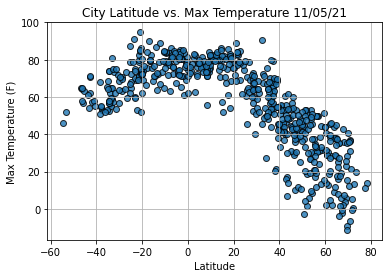

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

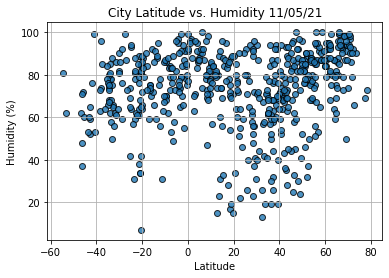

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

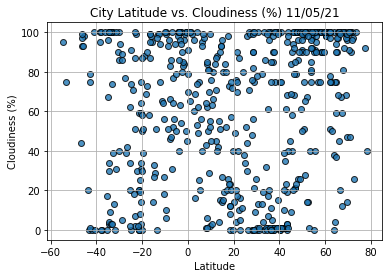

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

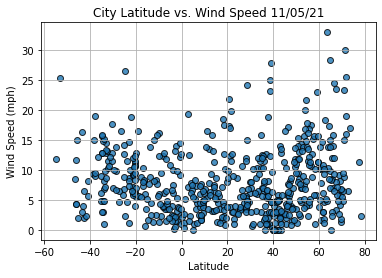

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [30]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [32]:
index13 = city_data_df.loc[13]
index13

City                      Rikitea
Country                        PF
Date          2021-11-06 00:09:31
Lat                      -23.1203
Lng                     -134.9692
Max Temp                    74.95
Humidity                       78
Cloudiness                     87
Wind Speed                   8.72
Name: 13, dtype: object

In [33]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4       True
       ...  
562     True
563     True
564     True
565    False
566     True
Name: Lat, Length: 567, dtype: bool

In [34]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Albany,US,2021-11-06 00:06:27,42.6001,-73.9662,39.92,76,35,4.92
3,Najran,SA,2021-11-06 00:09:27,17.4924,44.1277,61.32,28,26,1.72
4,Jumla,NP,2021-11-06 00:06:09,29.2747,82.1838,39.96,41,9,4.59
5,Boa Vista,BR,2021-11-06 00:09:28,2.8197,-60.6733,81.01,63,60,7.09
6,Butaritari,KI,2021-11-06 00:09:28,3.0707,172.7902,82.45,71,16,12.55
...,...,...,...,...,...,...,...,...,...
561,Pioner,RU,2021-11-06 00:12:49,55.3166,85.9508,20.64,79,40,13.42
562,Aksarka,RU,2021-11-06 00:12:50,66.5606,67.7975,17.35,96,99,6.44
563,Puerto Cabezas,NI,2021-11-06 00:12:50,14.0351,-83.3888,76.86,91,90,11.34
564,Pahrump,US,2021-11-06 00:12:31,36.2083,-115.9839,79.95,19,0,8.12


In [35]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Albany,US,2021-11-06 00:06:27,42.6001,-73.9662,39.92,76,35,4.92
3,Najran,SA,2021-11-06 00:09:27,17.4924,44.1277,61.32,28,26,1.72
4,Jumla,NP,2021-11-06 00:06:09,29.2747,82.1838,39.96,41,9,4.59
5,Boa Vista,BR,2021-11-06 00:09:28,2.8197,-60.6733,81.01,63,60,7.09
6,Butaritari,KI,2021-11-06 00:09:28,3.0707,172.7902,82.45,71,16,12.55


In [36]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

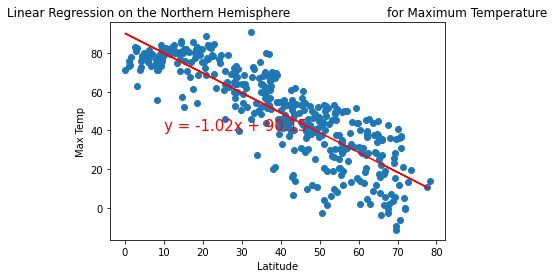

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


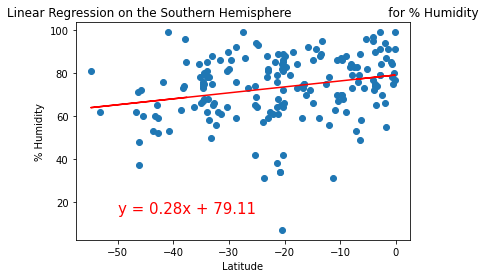

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

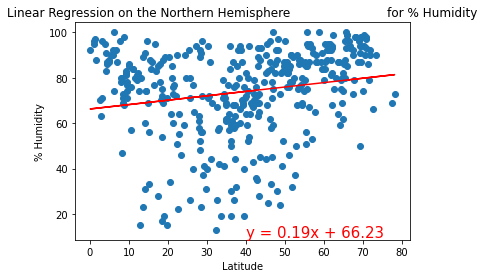

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

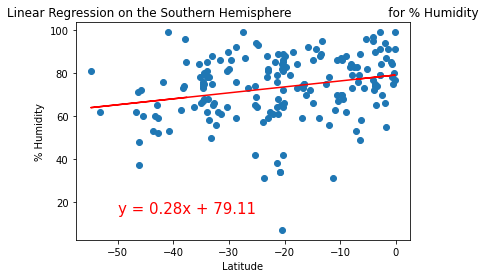

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

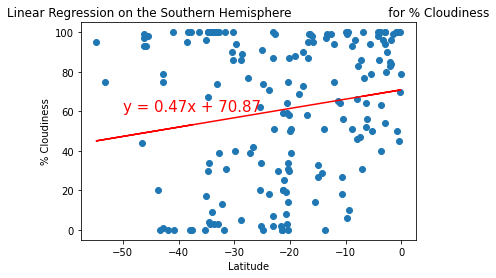

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

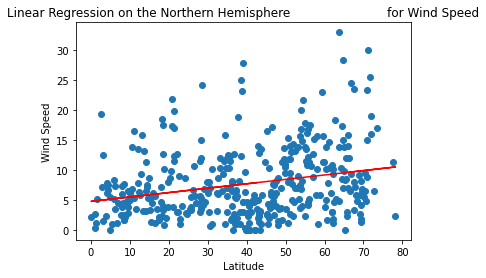

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

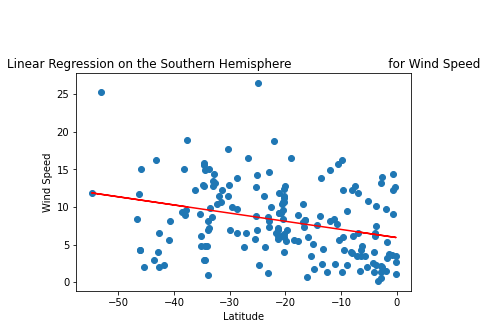

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))
